# Setup

Utility section to read if you want to run this notebook.

The packages needed to run this notebook are listed in the requirements.txt file.

In a terminal, after having created a new envrionment, you can simply run:
```
pip install -r requirements.txt
```

For the notebook to work properly, you must place it in the same folder as the `model_torch.pth`, `utils.py`, `rossler_map.py` and `time_series.py` files.


# Packages Imports

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from rossler_map import RosslerMap
from time_series import DiscreteModel
from utils import Dynamics, Statistics, compute_traj, plot3D_traj

# Load models

Load trained model

In [2]:
checkpoint_path = Path("trained_model.ckpt")

trained_model = DiscreteModel.load_from_checkpoint(checkpoint_path=checkpoint_path)

trained_model.normalize = False
# trained_model.eval()

Load ground thruth model

In [3]:
rossler_map_true = RosslerMap(delta_t=trained_model.hparams.delta_t)

# Set hyperparameters for trajectories

In [4]:
TRAJECTORY_DUR = 1000
nb_steps = int(TRAJECTORY_DUR // trained_model.hparams.delta_t)

save_dir_path = checkpoint_path.parent

## Compute trajectories

In [5]:
init_pos = [-5.75, -1.6, 0.02]  # Training init position

traj_pred, traj_true, time_list = compute_traj(trained_model, rossler_map_true, init_pos, nb_steps)
np.save(os.path.join(save_dir_path, "traj_pred_train.npy"), traj_pred)
np.save(os.path.join(save_dir_path, "traj_true_train.npy"), traj_true)
np.save(os.path.join(save_dir_path, "time_list_train.npy"), time_list)

100%|██████████| 999998/999998 [03:43<00:00, 4472.14it/s]


In [6]:
init_pos = [
    0.01,
    2.5,
    3.07,
]  # Init position different from the one used for training which was [-5.75, -1.6, 0.02]

traj_pred, traj_true, time_list = compute_traj(trained_model, rossler_map_true, init_pos, nb_steps)
np.save(os.path.join(save_dir_path, "traj_pred_test.npy"), traj_pred)
np.save(os.path.join(save_dir_path, "traj_true_test.npy"), traj_true)
np.save(os.path.join(save_dir_path, "time_list_test.npy"), time_list)

100%|██████████| 999998/999998 [03:54<00:00, 4267.51it/s]


# Compute metric on train data

## Load already computed trajectories

In [7]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_train.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_train.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_train.npy"))

## Compute metrics

### Statistics

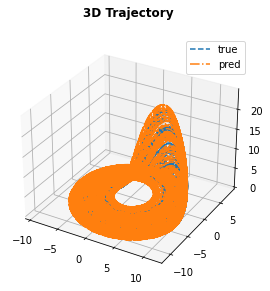

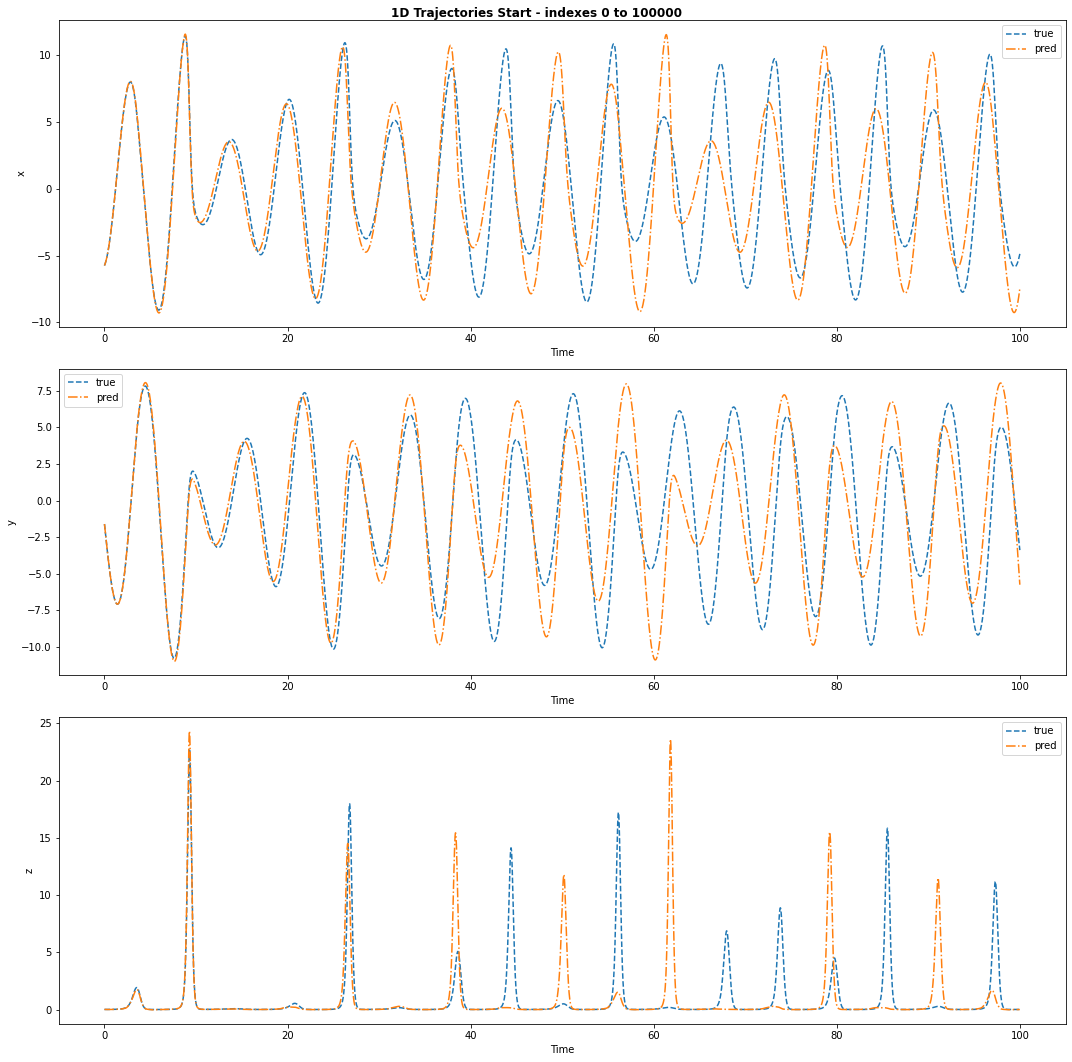

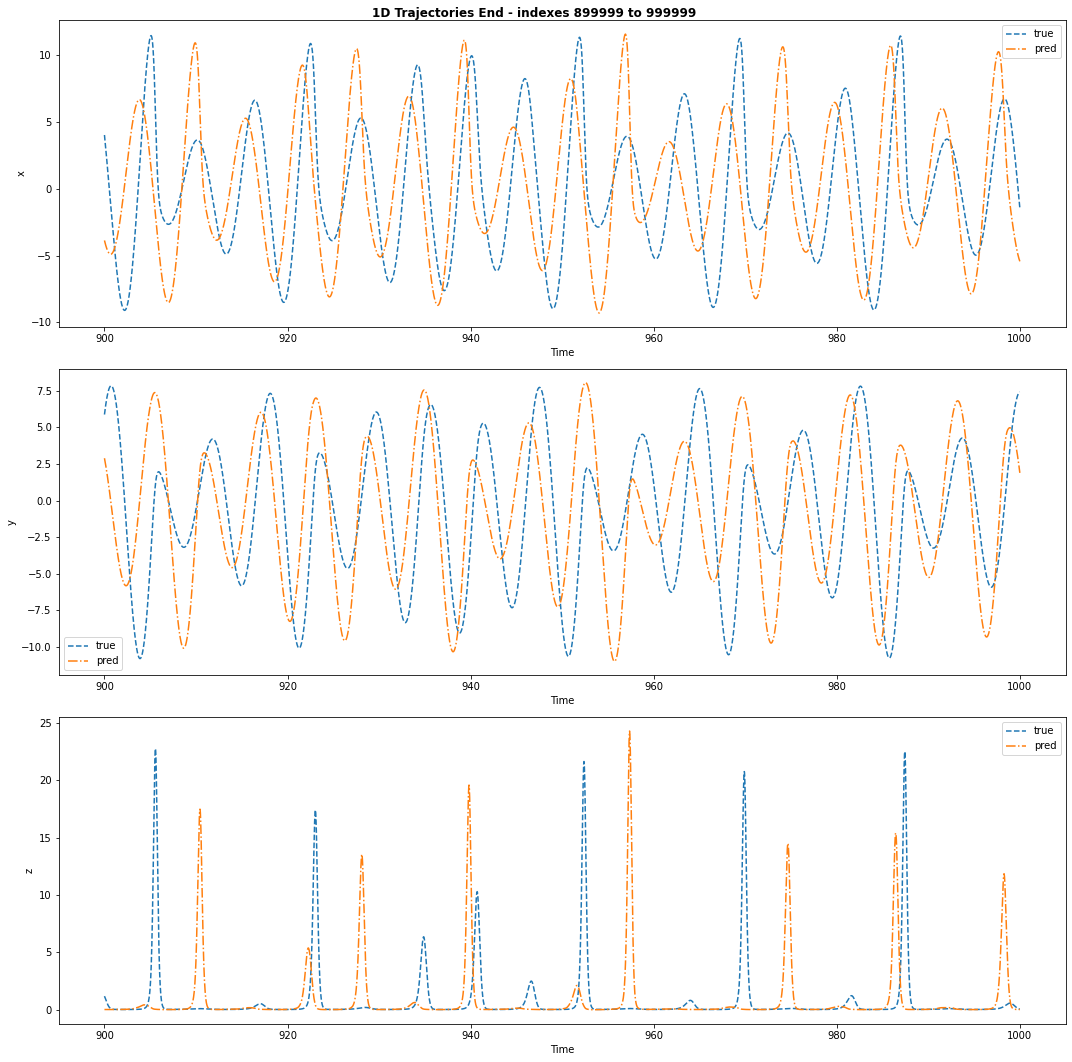

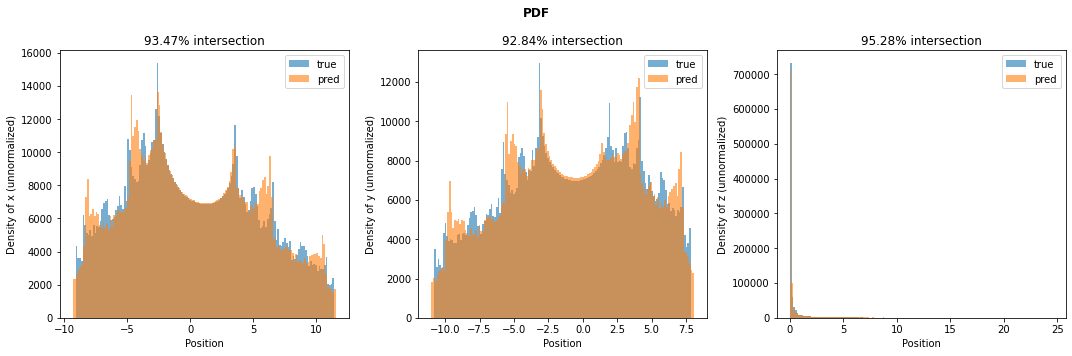

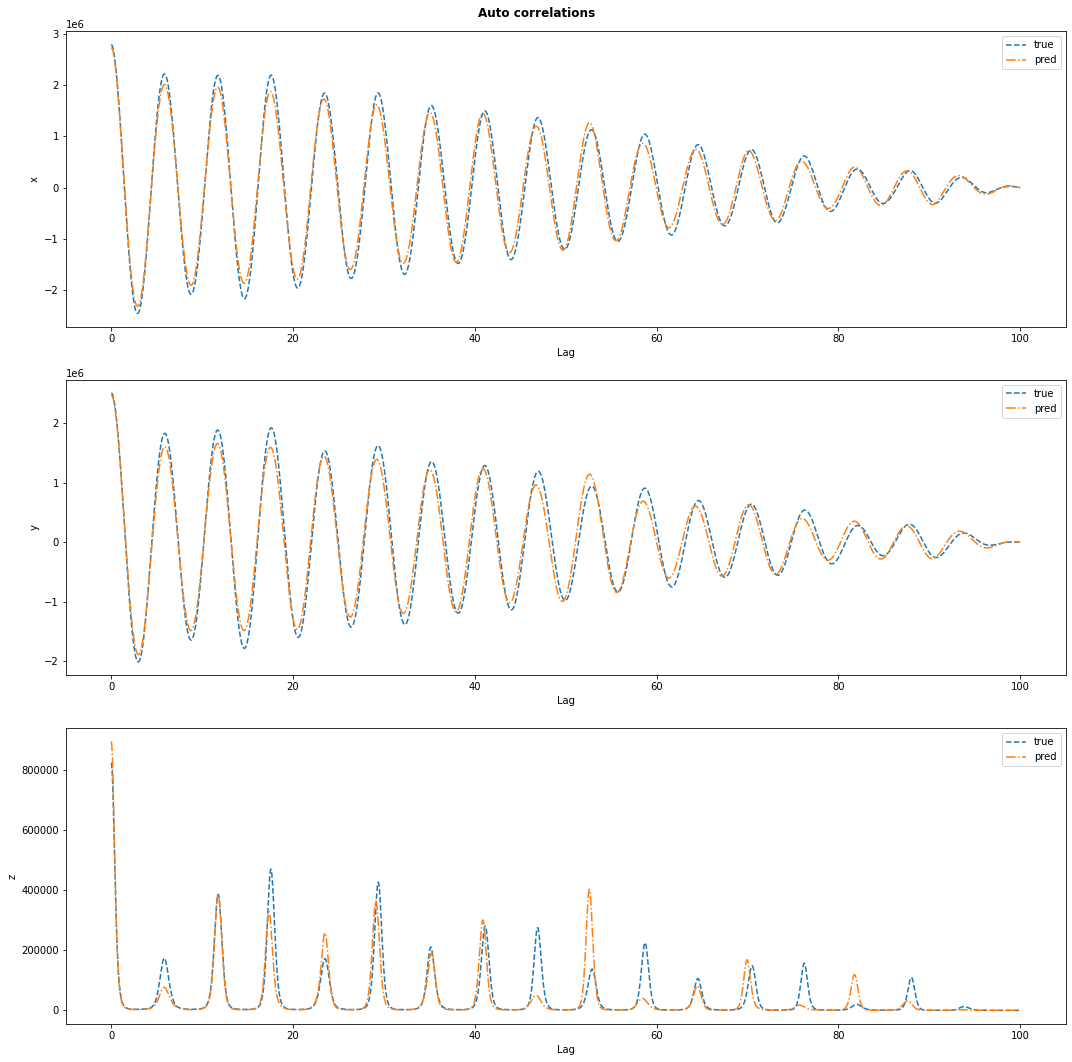

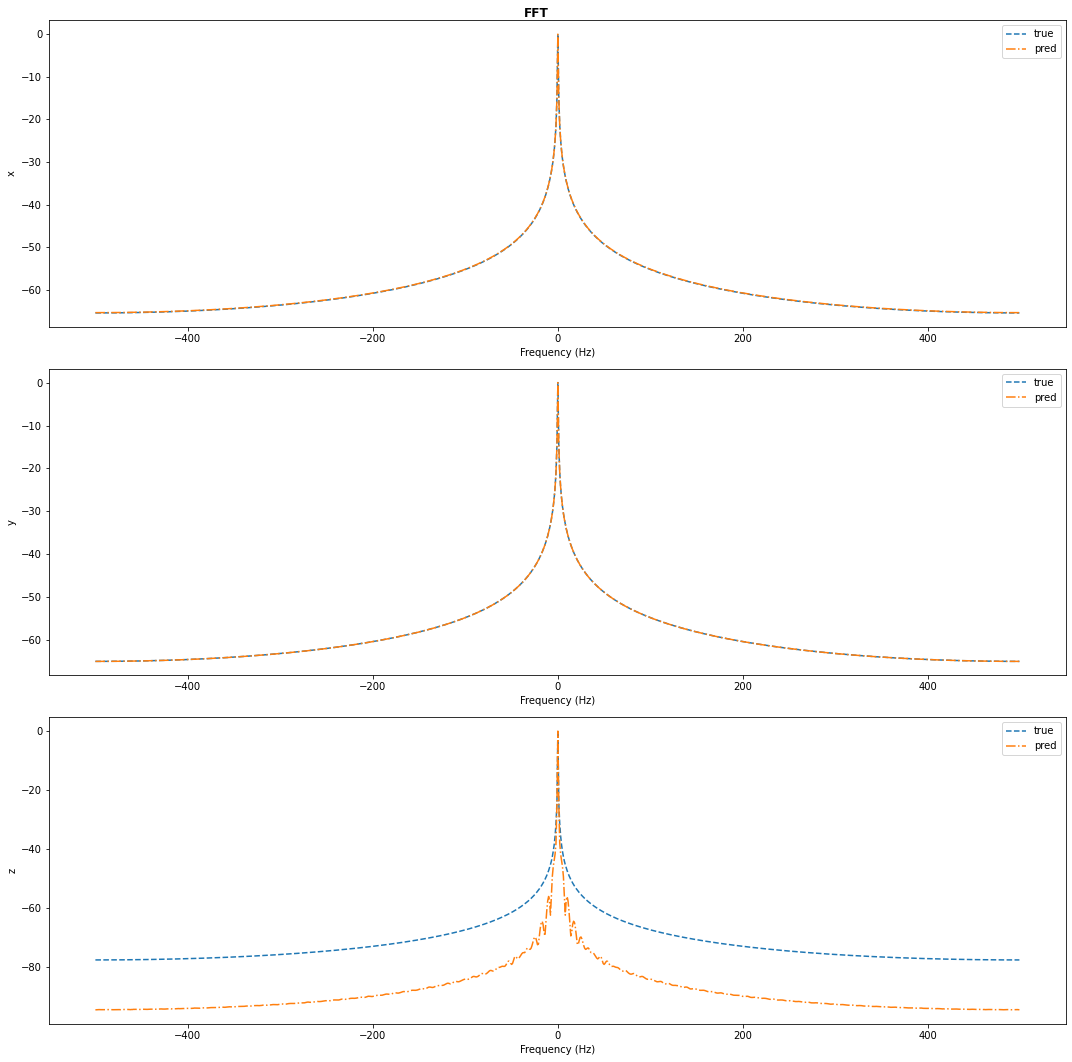

In [8]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

### Dynamics

In [9]:
dym = Dynamics(
    wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
)
dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
dym.plot_all()

  0%|          | 39/999999 [00:00<43:17, 385.03it/s]

Start computation of Lyaponuv exponent on the predicted trajectory...


  0%|          | 149/999999 [00:00<11:11, 1488.47it/s]

Start computation of Lyaponuv exponent on the true trajectory...


  0%|          | 52/100000 [00:00<03:14, 513.51it/s]

lyap_true: [ 7.09102438e-02 -3.73528694e-04 -5.38314030e+00],
lyap_pred: [ 6.88455812e-02  4.94344694e-04 -2.64201059e+00],
lyap_error : [2.06466260e-03 8.67873389e-04 2.74112970e+00]
Start computation of one of the equilibrum point on the predicted trajectory...


100%|██████████| 100000/100000 [02:51<00:00, 583.50it/s]

fix_point_true: [ 0.0070262  -0.03513102  0.03513102],
fix_point_pred: [ 0.00193887  0.00800549 -0.00222058],
fix_point_error : [0.00508733 0.04313652 0.0373516 ]


# Compute metric on test data

## Load already computed trajectories

In [10]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_test.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_test.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_test.npy"))

## Compute metrics

### Statistics

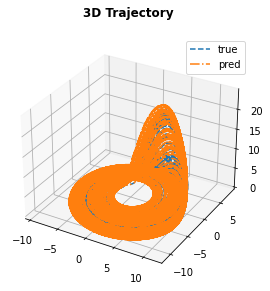

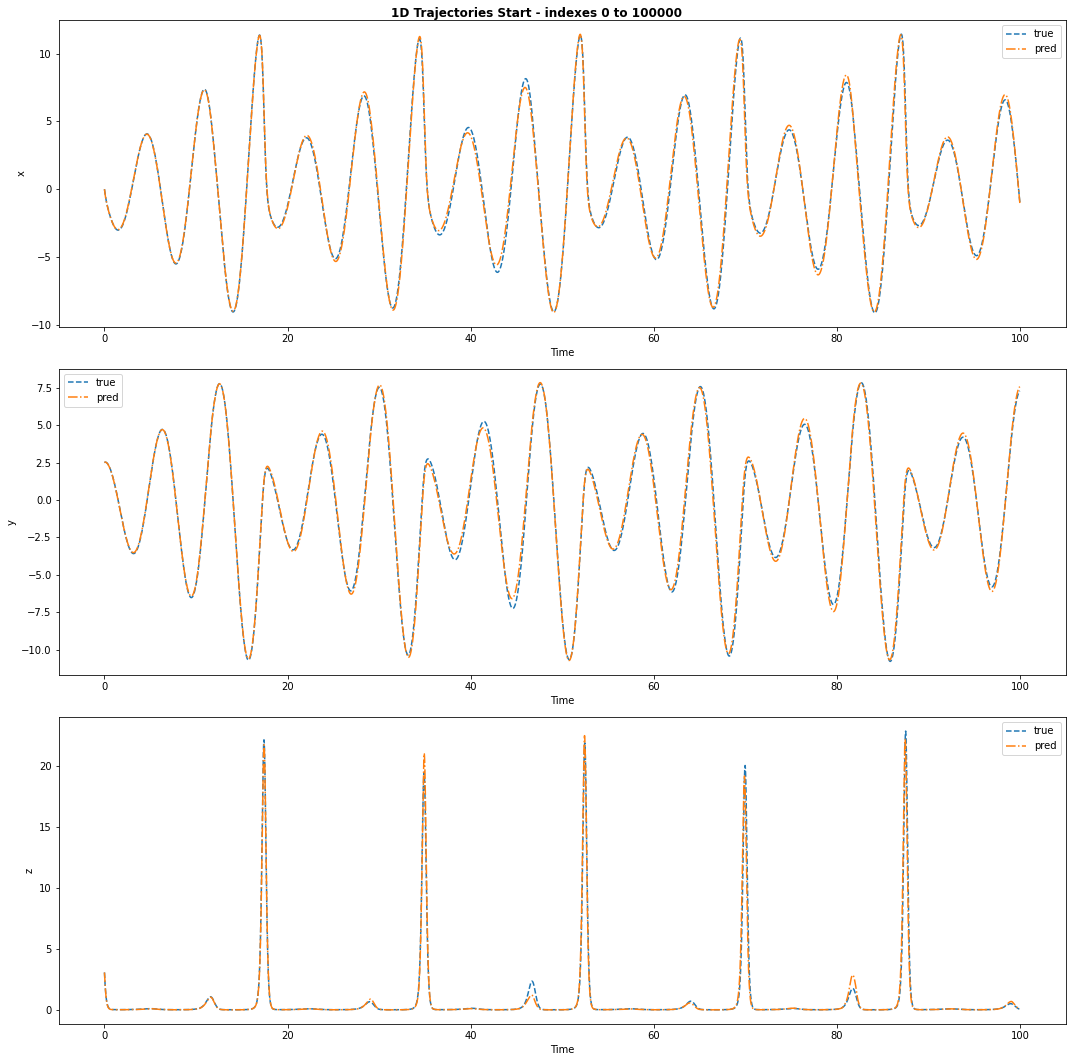

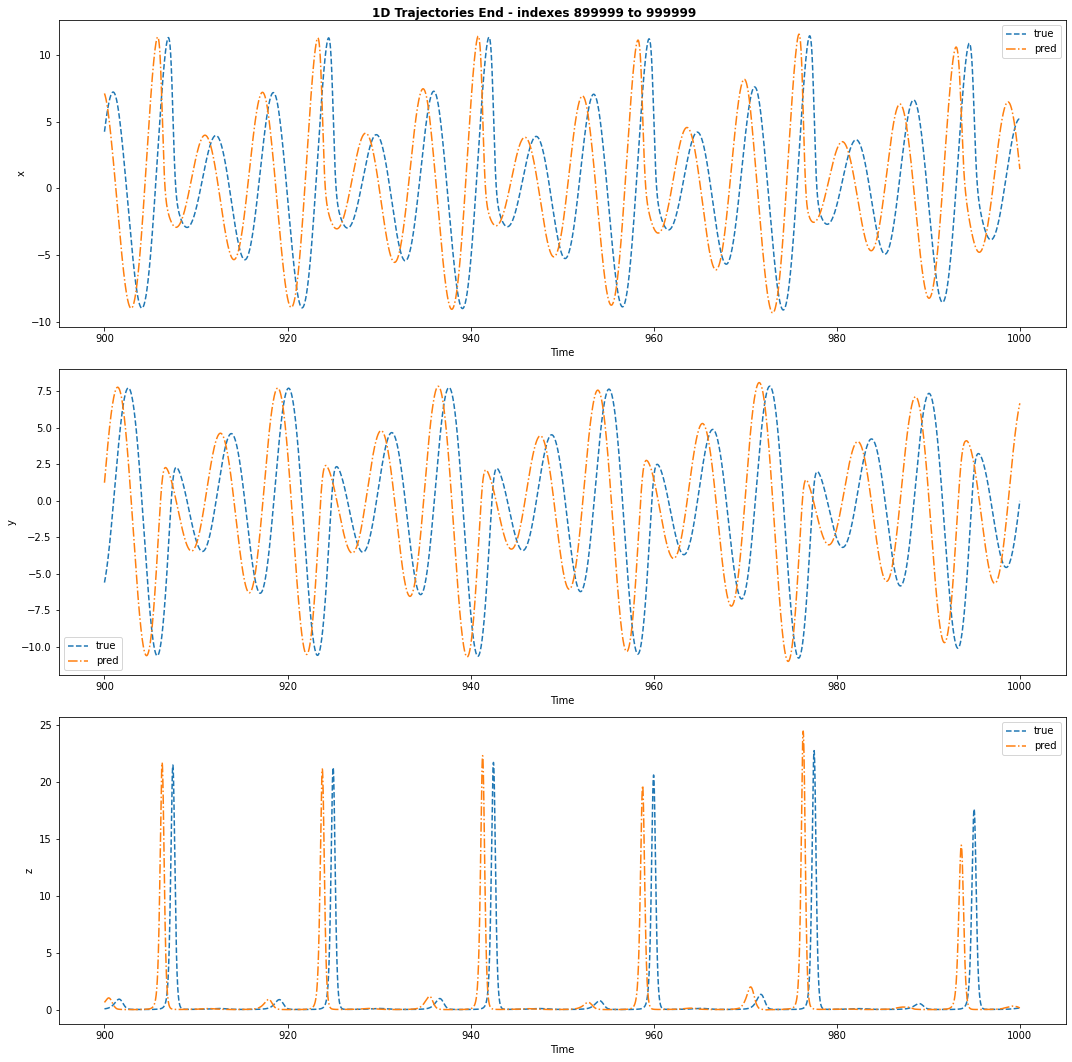

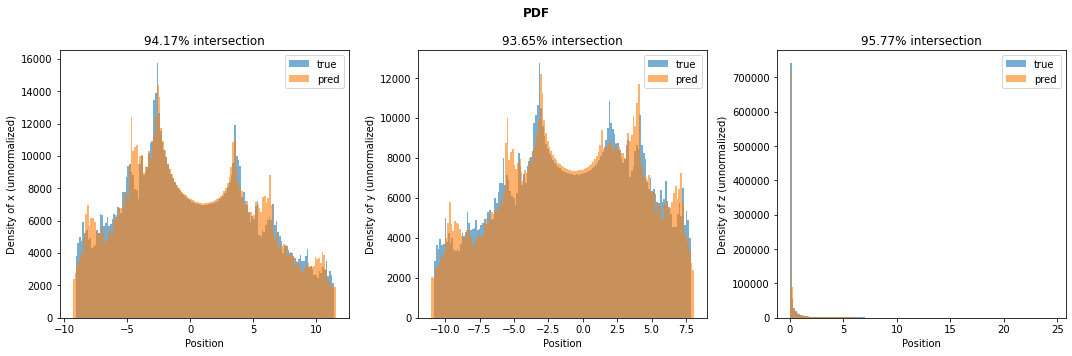

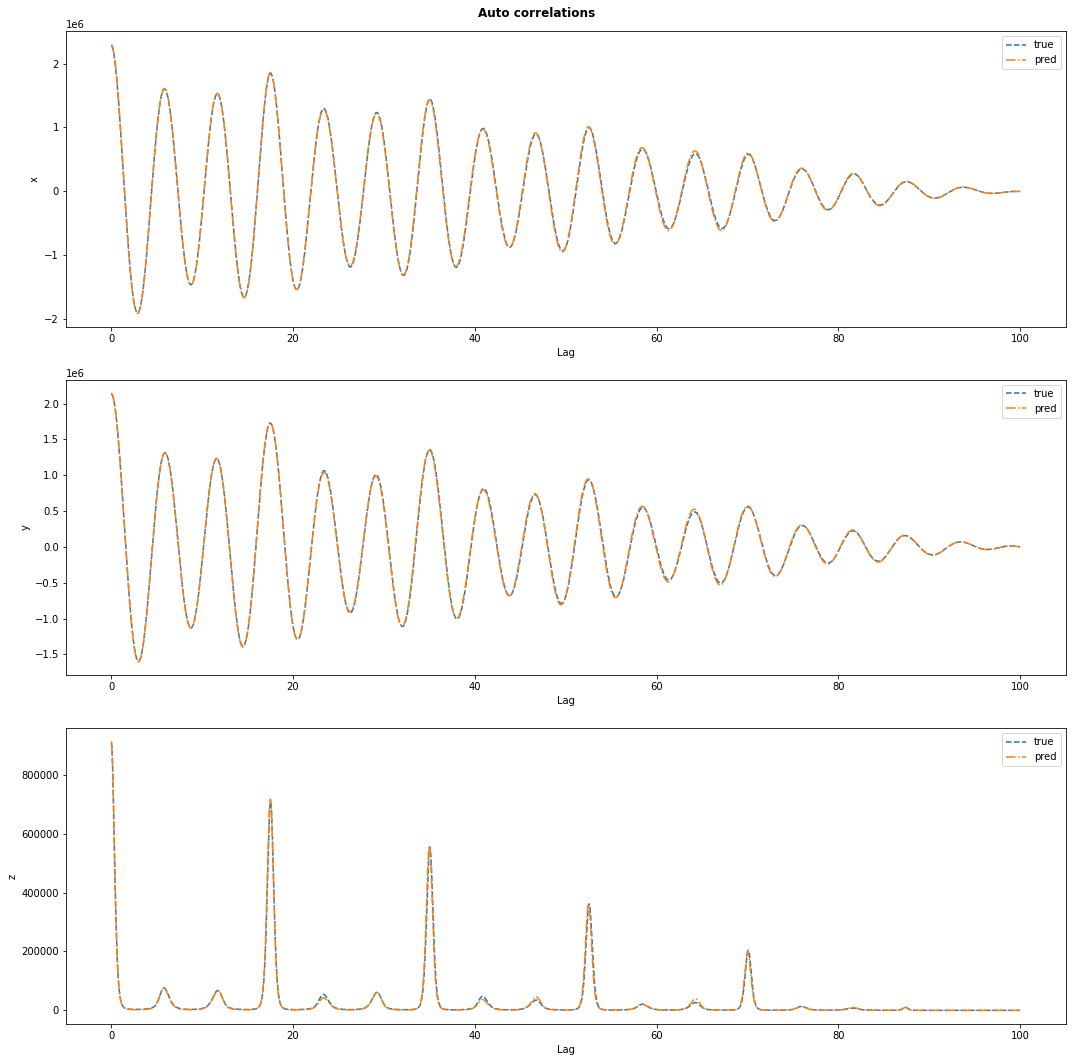

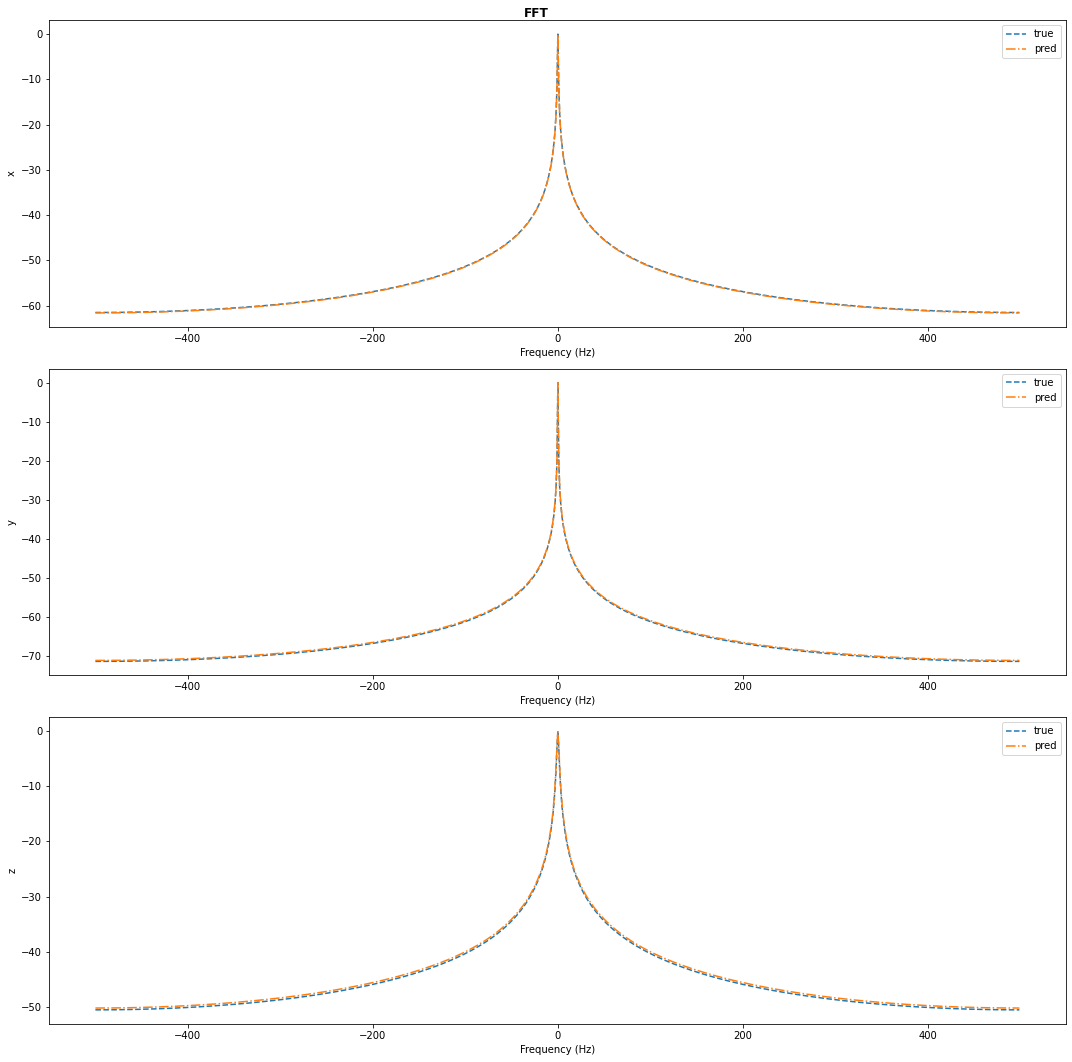

In [11]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

### Dynamics

In [12]:
dym = Dynamics(
    wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
)
dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
dym.plot_all()

  0%|          | 58/999999 [00:00<28:52, 577.04it/s]

Start computation of Lyaponuv exponent on the predicted trajectory...


  0%|          | 488/999999 [00:00<06:46, 2456.83it/s]

Start computation of Lyaponuv exponent on the true trajectory...


  0%|          | 53/100000 [00:00<03:09, 526.25it/s]

lyap_true: [ 6.32855002e-02  3.57661490e-03 -5.39351173e+00],
lyap_pred: [ 6.15537473e-02  4.02669811e-04 -2.65205043e+00],
lyap_error : [1.73175290e-03 3.17394509e-03 2.74146130e+00]
Start computation of one of the equilibrum point on the predicted trajectory...


100%|██████████| 100000/100000 [02:50<00:00, 587.56it/s]

fix_point_true: [ 0.0070262  -0.03513102  0.03513102],
fix_point_pred: [ 0.00193887  0.00800549 -0.00222058],
fix_point_error : [0.00508733 0.04313652 0.0373516 ]
